In [3]:
import numpy as np

# https://rdr.ucl.ac.uk/articles/dataset/Recording_with_a_Neuropixels_probe/25232962/1

# from params.py
# dat_path = 'dataSubset.dat'
# n_channels_dat = 72
# dtype = 'int16'
# offset = 0
# sample_rate = 30000
# hp_filtered = False

# https://github.com/kwikteam/phy-contrib/blob/master/docs/template-gui.md

inputfilename = 'dataSubset.dat'
chanMap = np.load('channel_map.npy').ravel() # get rid of 2nd dim from matlab
chanMap.shape

(72,)

In [4]:
chanMap

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71], dtype=uint32)

In [24]:
chanPos = np.load('miniDataset/channel_positions.npy')
chanPos

array([[  43., 3020.],
       [  11., 3020.],
       [  59., 3040.],
       [  43., 3060.],
       [  11., 3060.],
       [  59., 3080.],
       [  27., 3080.],
       [  43., 3100.],
       [  11., 3100.],
       [  59., 3120.],
       [  27., 3120.],
       [  43., 3140.],
       [  11., 3140.],
       [  59., 3160.],
       [  27., 3160.],
       [  43., 3180.],
       [  11., 3180.],
       [  59., 3200.],
       [  27., 3200.],
       [  43., 3220.],
       [  11., 3220.],
       [  59., 3240.],
       [  27., 3240.],
       [  43., 3260.],
       [  11., 3260.],
       [  59., 3280.],
       [  27., 3280.],
       [  43., 3300.],
       [  11., 3300.],
       [  59., 3320.],
       [  27., 3320.],
       [  43., 3340.],
       [  11., 3340.],
       [  59., 3360.],
       [  27., 3360.],
       [  43., 3380.],
       [  11., 3380.],
       [  59., 3400.],
       [  27., 3400.],
       [  11., 3420.],
       [  59., 3440.],
       [  27., 3440.],
       [  43., 3460.],
       [  1

In [5]:
nchannels = 72
with open(inputfilename, 'rb') as fid:
    data_array = np.fromfile(fid, np.int16).reshape((-1, nchannels)).T
data_array.shape

(72, 1800000)

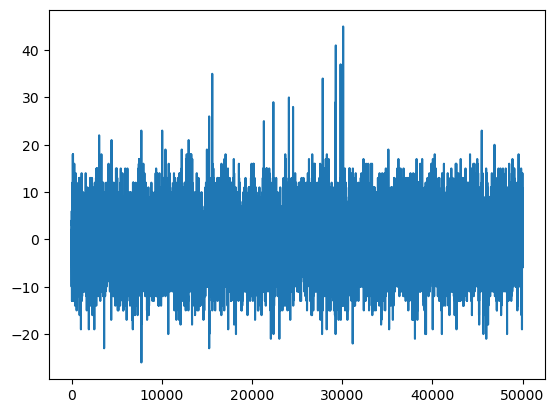

In [7]:
import matplotlib.pyplot as plt
plt.plot(data_array[0,:50000])

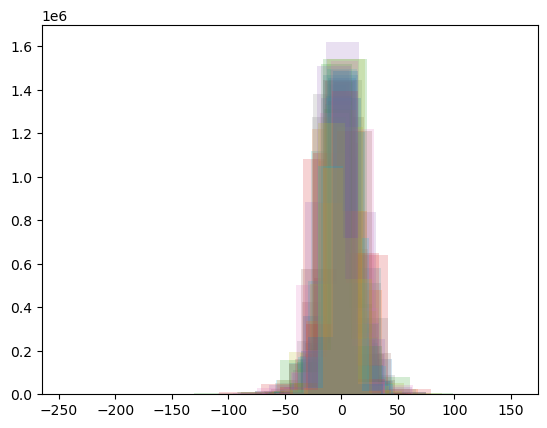

In [35]:
for ci in range(nchannels):
    plt.hist(data_array[ci],alpha=.2)

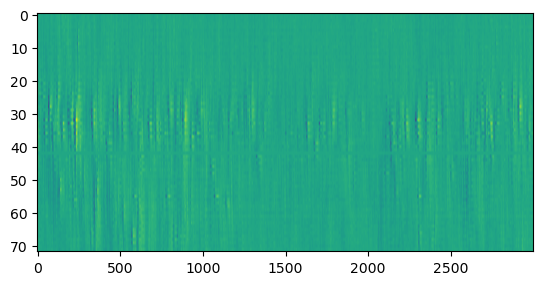

In [9]:
import matplotlib.pyplot as plt
plt.imshow(data_array[chanMap,:3000], aspect=20)

In [15]:
spk_templates = np.load('miniDataset/spike_templates.npy').ravel() # get rid of 2nd dim from matlab
spk_templates.shape

(58544,)

In [13]:
spk_ts = np.load('miniDataset/spike_times.npy').ravel() # get rid of 2nd dim from matlab
spk_ts.shape

(58544,)

In [26]:
spk_ts

array([    136,     145,     194, ..., 1799910, 1799948, 1799978],
      dtype=uint64)

unfiltered extracellular data


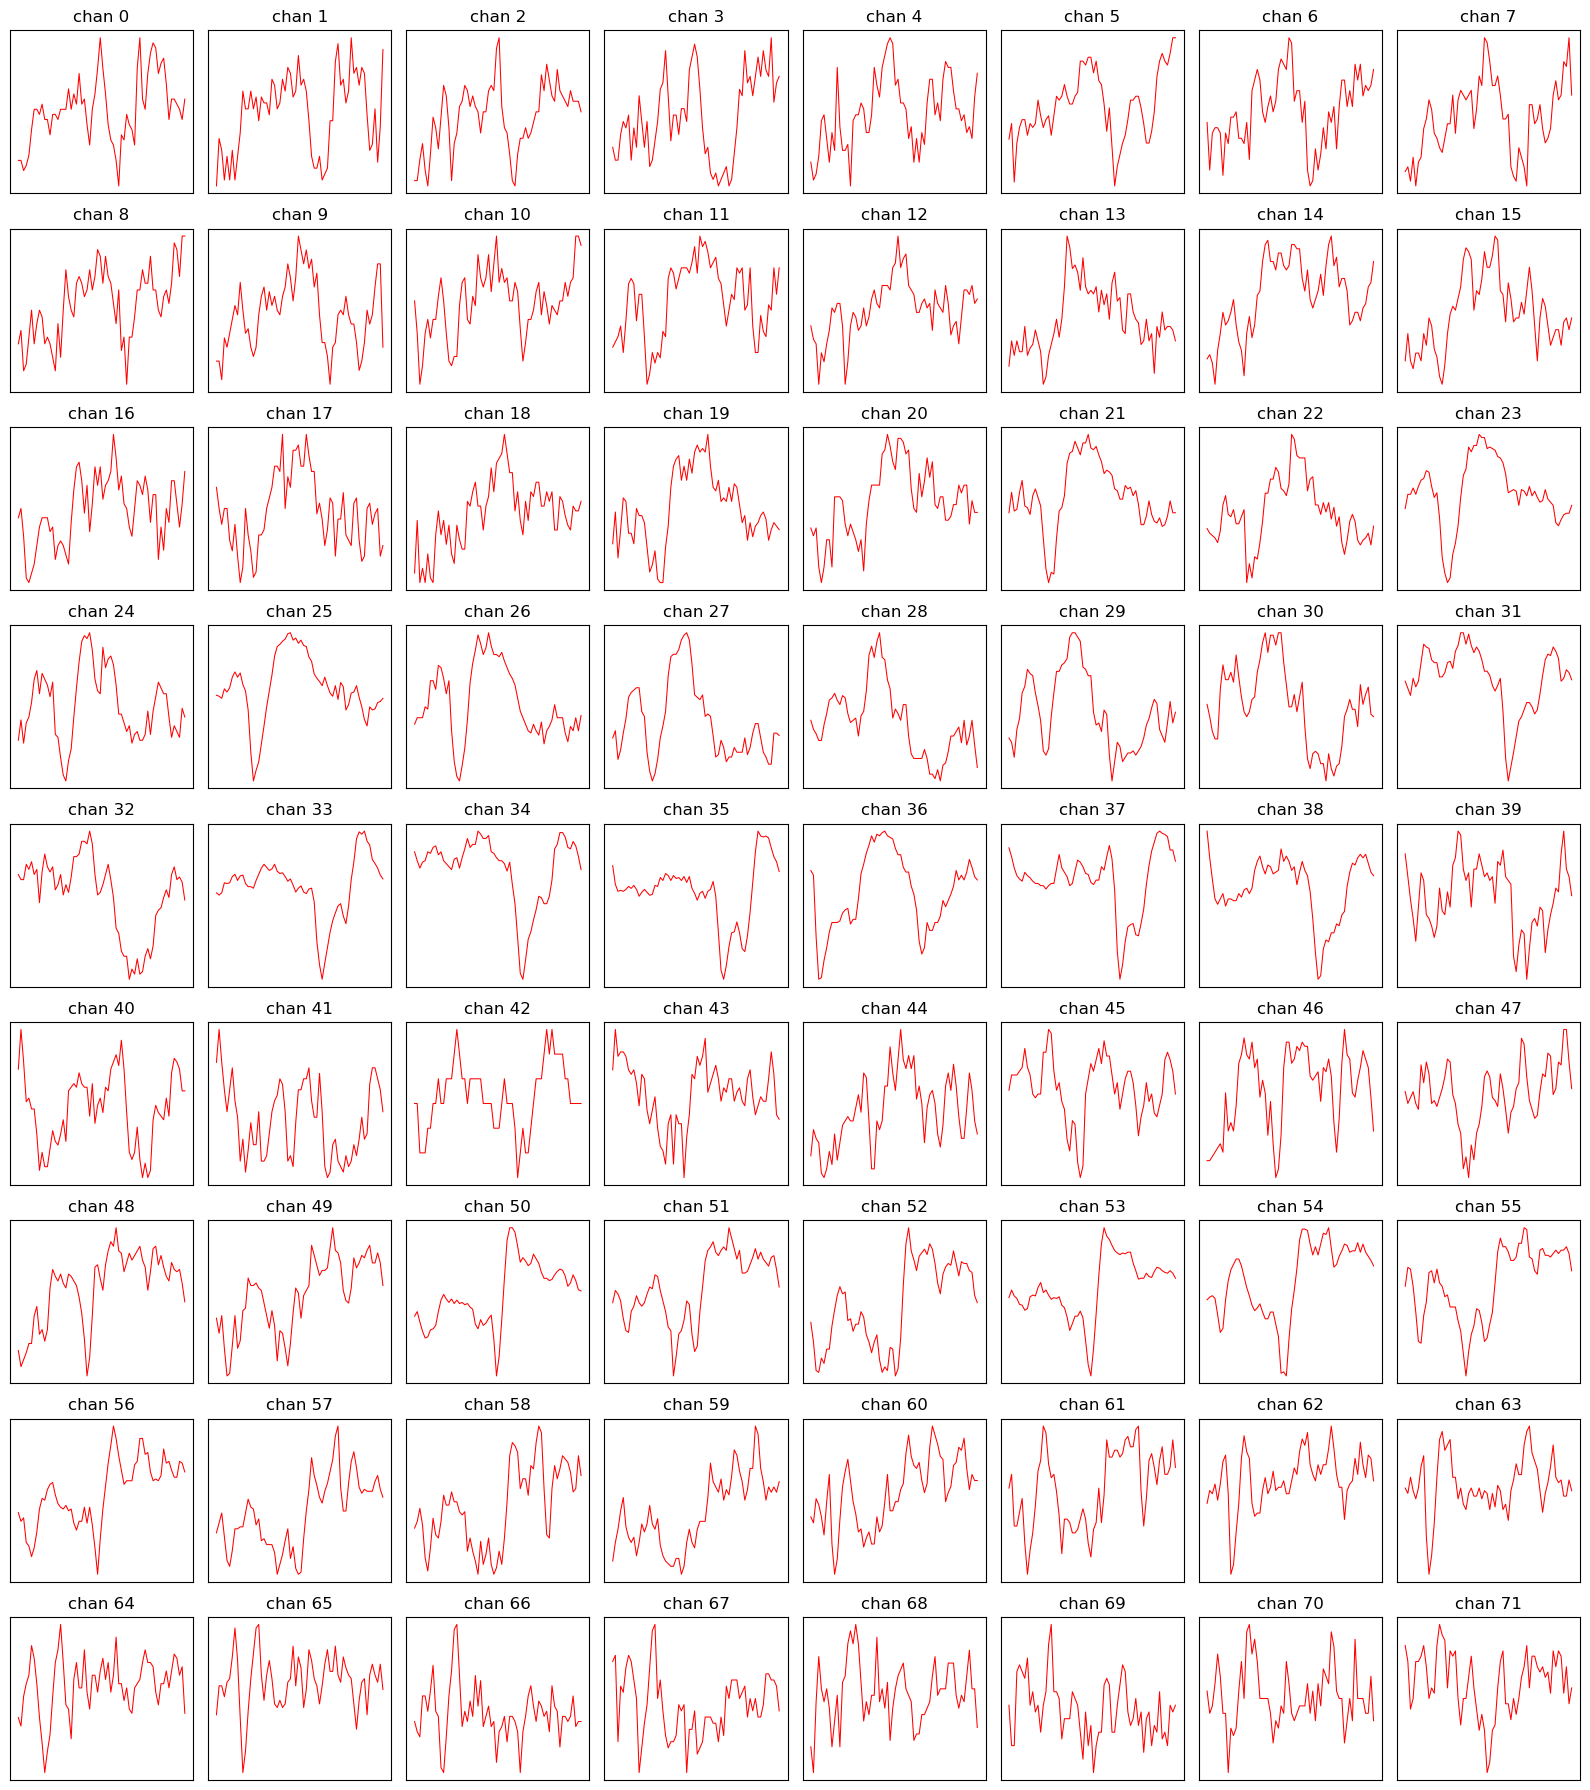

In [29]:
### Plot ALL channels each in a separate subplot within a time window around a juxta spike
## UNFILTERED DATA

spike_i = 0

Sampling_frequency = 30000
ncols = 8
nrows = int(np.ceil(nchannels/ncols))
f, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))

num_of_points_in_spike_trig_ivm = 64
window_half_size = num_of_points_in_spike_trig_ivm//2 #1 ms = 30
ix = spk_ts[spike_i]
window_ixs = np.arange(ix - window_half_size, ix + window_half_size +  int(window_half_size % 2 == 1)).astype('int')

# # get common y scale for all channels?
# ymin, ymax = extra_Volts[:,window_ixs].min(), extra_Volts[:,window_ixs].max()

for chan_i in range(nchannels):
    ax = axes.ravel()[chan_i]

    ax.plot(window_ixs / Sampling_frequency, data_array[chan_i,window_ixs], c='r', lw=0.75, label='extra')
    
    ax.set(xticks=[], yticks=[], title=f'chan {chan_i}')
#     ax.set(ylim=(ymin, ymax))
f.tight_layout()
print('unfiltered extracellular data')
plt.show()